In [13]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm
import requests
#import dill
from bs4 import BeautifulSoup
#from datetime import datetime
import xml.etree.ElementTree as ET
from xml.etree.ElementTree import XML, fromstring, tostring
page = requests.get('https://traffic.api.here.com/traffic/6.2/flow.xml?app_id=wvzQzqmPlU1T9tjf0YLU&app_code=b_is4SmSRfh8e0-Mr2-low&bbox=28.639305, 77.204831;28.604430, 77.236216&responseattributes=sh,fc&units=metric')
soup = BeautifulSoup(page.text, "lxml")
roads = soup.find_all('fi')

In [14]:
a1=[]
loc_list_hv=[]
lats=[]
longs=[]
sus=[]
ffs=[]
c=0
for road in roads:
    #for j in range(0,len(shps)):
    myxml = fromstring(str(road))
    fc=5
    for child in myxml:
        #print(child.tag, child.attrib)
        if('fc' in child.attrib):
            fc=int(child.attrib['fc'])
        if('cn' in child.attrib):
            cn=float(child.attrib['cn'])
        if('su' in child.attrib):
            su=float(child.attrib['su'])
        if('ff' in child.attrib):
            ff=float(child.attrib['ff'])
    if((fc<=2) and (cn>=0.7)):
        shps=road.find_all("shp")
        for j in range(0,len(shps)):
            latlong=shps[j].text.replace(',',' ').split()
            #loc_list=[]
            la=[]
            lo=[]
            su1=[]
            ff1=[]
            
            for i in range(0,int(len(latlong)/2)):
                loc_list_hv.append([float(latlong[2*i]),float(latlong[2*i+1]),float(su),float(ff)])
                la.append(float(latlong[2*i]))
                lo.append(float(latlong[2*i+1]))
                su1.append(float(su))
                ff1.append(float(ff))
            lats.append(la)
            longs.append(lo)
            sus.append(np.mean(su1))
            ffs.append(np.mean(ff1))

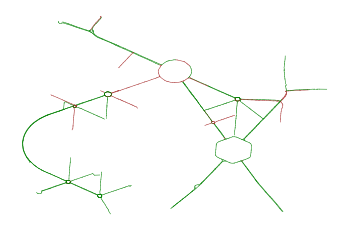

In [19]:
fig=plt.figure()
# plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = 'black'
#plt.plot(np.linspace(0,10,10),np.linspace(0,10,10))
plt.grid(False)
for i in range(0,len(lats)):
#     if(sus[i]/ffs[i]<0.25):
#         plt.plot(longs[i],lats[i], c='brown',linewidth=0.5)
    if(sus[i]<30):
        plt.plot(longs[i],lats[i], c='brown',linewidth=0.5)
#     elif(sus[i]/ffs[i]<0.5):
#         plt.plot(longs[i],lats[i], c='red',linewidth=0.5)
#     elif(sus[i]/ffs[i]<0.75):
#         plt.plot(longs[i],lats[i], c='yellow',linewidth=0.5)
    else:
        plt.plot(longs[i],lats[i], c='green',linewidth=0.5)
    #print(i)
#plt.xlim(-77.055,-77.015)
#plt.ylim(38.885,38.91)
plt.axis('off')
plt.show()

In [6]:
roads

[<fi><tmc de="Ashoka Road/Mansingh Road" le="0.04798" pc="271" qd="+"></tmc><shp fc="3">28.61092,77.22813 28.61096,77.22792 28.61101,77.22778 28.61104,77.22766 </shp><cf cn="0.7" ff="50.0" jf="0.0" sp="50.0" su="50.0" ty="TR"></cf></fi>,
 <fi><tmc de="NH-2/Shahjahan Road" le="0.01467" pc="270" qd="+"></tmc><shp fc="3">28.61104,77.22766 28.61104,77.22751 </shp><cf cn="0.7" ff="50.0" jf="0.0" sp="50.0" su="50.0" ty="TR"></cf></fi>,
 <fi><tmc de="Mansingh Road/Man Singh Road/Maulana Azad Road" le="0.36957" pc="269" qd="+"></tmc><shp fc="3">28.61104,77.22751 28.61103,77.22738 28.61101,77.22727 28.61098,77.22712 28.61096,77.22699 </shp><shp fc="3">28.61096,77.22699 28.61091,77.22688 </shp><shp fc="3">28.61091,77.22688 28.61068,77.22637 </shp><shp fc="3">28.61068,77.22637 28.61043,77.22578 </shp><shp fc="3">28.61043,77.22578 28.61023,77.22535 </shp><shp fc="3">28.61023,77.22535 28.61003,77.22489 </shp><shp fc="3">28.61003,77.22489 28.60998,77.22489 28.60992,77.22488 28.60985,77.22486 28.6097